In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Verlet algorithm

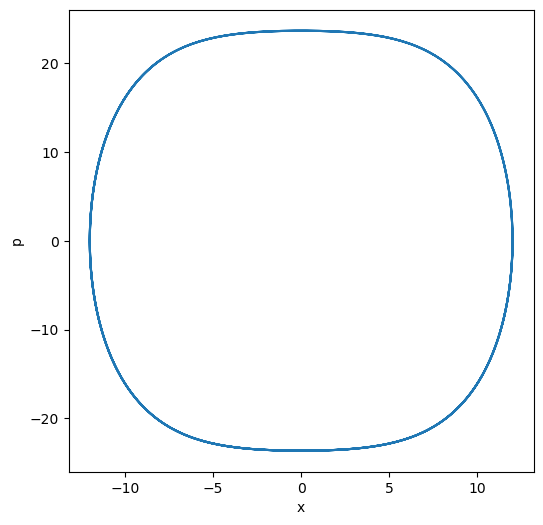

In [2]:
def H(x,p):
    return p**2/2 + x**2/2 + lam*x**4

def f(x):
    return -(x + 4*lam*x**3)

x_sols = []
p_sols = []

lam = 0.01
x0 = 12
p0 = 0.1

x = x0
p = p0
dt = 0.01

for i in np.arange(1001):
    
    x_dt = x + p*dt + f(x)*dt**2/2
    p = p + (f(x) + f(x_dt))*dt/2
    x = x_dt
    
    x_sols.append(x)
    p_sols.append(p)
    
plt.figure(figsize = (6,6))
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x_sols,p_sols);

In [4]:
H_evolve = []

for i in np.arange(len(x_sols)):
    
    H_evolve.append(H(x_sols[i],p_sols[i]))

H_evolve

[279.3648867815673,
 279.3644746702937,
 279.36376929177015,
 279.3627802353772,
 279.36152086209967,
 279.3600080388959,
 279.3582618070277,
 279.35630499347087,
 279.35416277591514,
 279.3518622128639,
 279.34943175095066,
 279.3469007217736,
 279.34429884034523,
 279.34165571666324,
 279.3390003909918,
 279.33636090223763,
 279.3337638973847,
 279.3312342883688,
 279.328794961105,
 279.32646653969164,
 279.32426720715415,
 279.3222125825363,
 279.32031565271444,
 279.3185867560629,
 279.3170336140454,
 279.31566140596584,
 279.3144728815002,
 279.31346850522164,
 279.3126466271435,
 279.3120036732904,
 279.31153435047315,
 279.311231859737,
 279.3110881133731,
 279.3110939508807,
 279.3112393498303,
 279.3115136281737,
 279.3119056351596,
 279.312403928609,
 279.3129969368907,
 279.3136731044723,
 279.31442102042035,
 279.3152295296642,
 279.31608782721776,
 279.3169855358823,
 279.3179127682119,
 279.31886017373745,
 279.3198189725941,
 279.3207809768088,
 279.321738600564,
 279.32

# Taylor series method 

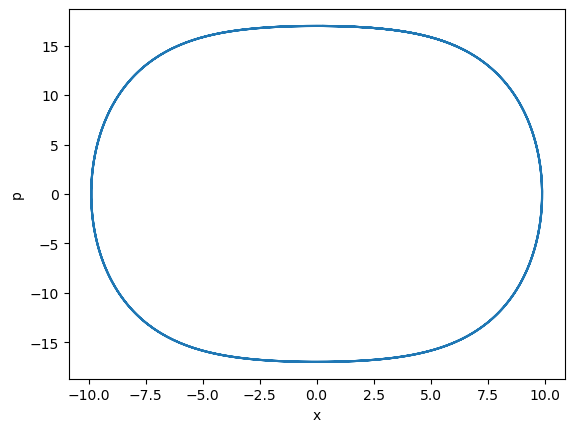

In [57]:
x_sols = []
p_sols = []

x0 = 0.11
p0 = 17

x = x0
p = p0

dt = 0.01

for i in np.arange(1001):
    
    x_dt = x + p*dt - (x + 4*lam*x**3)*dt**2 / 2
    p_dt = p - (x + 4*lam*x**3)*dt - p*(1 + 12*lam*x**2)*dt**2/2
    x = x_dt
    p = p_dt
    x_sols.append(x)
    p_sols.append(p)
    
plt.figure()
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x_sols,p_sols);

In [21]:
H_evolve = []

for i in np.arange(len(x_sols)):
    
    H_evolve.append(H(x_sols[i],p_sols[i]))

H_evolve

[0.5101884855419508,
 0.5100894986886031,
 0.5100899744490838,
 0.5100880897506245,
 0.5100866263209686,
 0.5100851143230469,
 0.5100836081878064,
 0.5100821013542753,
 0.5100805946094875,
 0.5100790878589786,
 0.5100775811140855,
 0.510076074373448,
 0.5100745676372292,
 0.5100730609054094,
 0.5100715541779912,
 0.510070047454974,
 0.5100685407363582,
 0.5100670340221434,
 0.5100655273123295,
 0.5100640206069169,
 0.5100625139059053,
 0.5100610072092949,
 0.5100595005170858,
 0.5100579938292776,
 0.5100564871458707,
 0.5100549804668644,
 0.5100534737922593,
 0.5100519671220551,
 0.5100504604562521,
 0.51004895379485,
 0.5100474471378491,
 0.5100459404852489,
 0.5100444338370498,
 0.5100429271932516,
 0.5100414205538545,
 0.5100399139188582,
 0.5100384072882627,
 0.5100369006620682,
 0.5100353940402744,
 0.5100338874228816,
 0.5100323808098898,
 0.5100308742012983,
 0.510029367597108,
 0.5100278609973186,
 0.51002635440193,
 0.510024847810942,
 0.5100233412243549,
 0.5100218346421685,


# odeint

C:\Users\cilli\AppData\Local\Temp\ipykernel_14424\2055094699.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


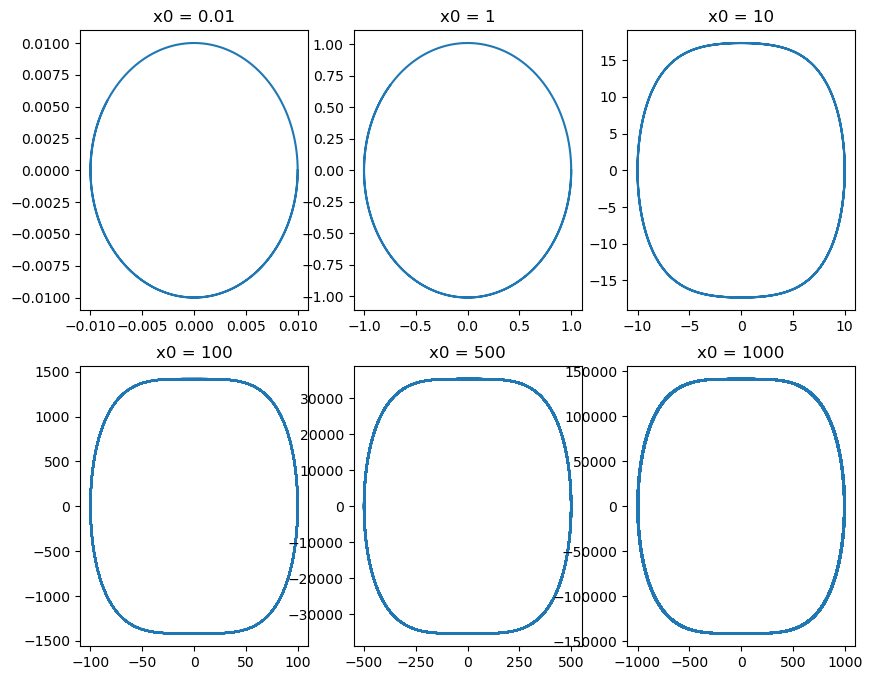

In [55]:
def dSdt(t, S):
    x, p = S
    return [p, -x-4*lam*x**3]

x0 = [0.01,1,10,100,500,1000]
t = np.linspace(0,10,10000)
plt.figure(figsize = (10,8))
plt.title("Initial momentum is 0, Initial displacement varies")

for i in np.arange(6):
    x_0 = x0[i]
    p0 = 0
    S0 = [x_0,p0]
    sols = sp.integrate.odeint(dSdt, y0 = S0, t=t, tfirst = True)
    sols = sols.T
    plt.subplot(2,3,i+1)
    plt.title("x0 = "+ str(x_0))
    plt.plot(sols[0],sols[1])



In [ ]:
plt.figure(figsize = (10,10))
plt.title("Changing intial momentum with initial displacement 0")
po
for i in np.arange(6):
    x_0 = 0
    p0 = 0
    S0 = [x_0,p0]
    sols = sp.integrate.odeint(dSdt, y0 = S0, t=t, tfirst = True)
    sols = sols.T
    plt.subplot(2,3,i+1)
    plt.title("p0 = "+ str(x_0))
    plt.plot(sols[0],sols[1])
    

In [62]:
H_evolve = []

for i in np.arange(len(x_sols)):
    
    H_evolve.append(H(sols[0][i],sols[1][i]))

H_evolve

[10000500000.0,
 10000500058.586802,
 10000500013.139404,
 10000500140.532223,
 10000500394.607693,
 10000500546.638128,
 10000500408.809439,
 10000500384.612066,
 10000500369.658241,
 10000500458.225864,
 10000500478.294424,
 10000500484.256378,
 10000500556.675858,
 10000500716.655933,
 10000500592.710245,
 10000500169.467007,
 10000499728.901396,
 10000499598.759695,
 10000499620.41391,
 10000499619.933332,
 10000499631.73328,
 10000499662.562935,
 10000499643.84025,
 10000499585.929909,
 10000499591.087324,
 10000499838.209042,
 10000500177.269806,
 10000500334.123875,
 10000500376.78688,
 10000500380.177345,
 10000500413.474386,
 10000500511.733973,
 10000500728.78082,
 10000500668.392126,
 10000500316.674948,
 10000499985.44765,
 10000499739.646254,
 10000499657.52186,
 10000499390.546875,
 10000498998.12977,
 10000498654.187048,
 10000498562.740229,
 10000498676.21222,
 10000498794.862213,
 10000498668.855078,
 10000498612.124805,
 10000498720.663113,
 10000498740.669184,
 10000